In [1]:
import TestImages: testimage
import ImageView: imshow

img = testimage("mandrill")
(xsize, ysize) = size(img)

(512, 512)

In [4]:
function warp2(x, y, p)
    xcenter1 = p[:xcenter1]
    ycenter1 = p[:ycenter1]
    xcenter2 = p[:xcenter2]
    ycenter2 = p[:ycenter2]
    distance1 = sqrt((xcenter1-x)^2 + (ycenter1-y)^2)
    distance2 = sqrt((xcenter2-x)^2 + (ycenter2-y)^2)
    mod1 = ([0.75 0.25] * [1; sin(distance1 / (p[:time]+p[:shift]+0.1))])[1] # add 0.1 to avoid divide by zero
    mod2 = ([0.75 0.25] * [1; sin(distance2 / (p[:time]+p[:shift]+0.1))])[1] # add 0.1 to avoid divide by zero
    clip(n, nsize) = max(min(nsize, n), 1)
    g(xcenter1, xcenter2, x, xsize) = clip((xcenter1 + xcenter2)/2 + (x - xcenter1)*mod1 + (x - xcenter2)*mod2, xsize)
    xnew = g(xcenter1, xcenter2, x, p[:xsize])
    ynew = g(ycenter1, ycenter2, y, p[:ysize])
    xnew, ynew
end

warp2 (generic function with 1 method)

In [13]:
params = Dict(:time=>0.0, :xcenter1=>61, :ycenter1=>176, :xcenter2=>55, :ycenter2=>355)
# at least one of the above should be float and not integer, so that the dictionary type is
# Dict{Symbol, Real}  and not Dict{Symbol, Int64}

Dict{Symbol, Real} with 5 entries:
  :xcenter2 => 55
  :ycenter2 => 355
  :ycenter1 => 176
  :xcenter1 => 61
  :time     => 0.0

In [19]:
function apply_warp(warp, im, p)
    (xsize, ysize) = size(im)
    p[:xsize] = xsize
    p[:ysize] = ysize
    function linear_interpolation(x_y)
        # a rough draft, this can be improved; works on im
        x = x_y[1]
        y = x_y[2]
        dx=mod(x,1)
        dy=mod(y,1)
        x_left = floor(Int,x)
        y_left = floor(Int,y)
        x_right = min(x_left + 1, xsize)
        y_right = min(y_left + 1, ysize)
        im[x_left,y_left]*(1-dx)*(1-dy) + im[x_left,y_right]*(1-dx)*dy + im[x_right,y_left]*dx*(1-dy) + im[x_right, y_right]*dx*dy
    end
    [linear_interpolation(warp(x,y,p)) for x in 1:xsize, y in 1:ysize]
end 

apply_warp (generic function with 1 method)

In [14]:
params[:time] = 3
params[:shift] = params[:time]/(1+0.01*params[:time])
params

Dict{Symbol, Real} with 6 entries:
  :shift    => 2.91262
  :xcenter2 => 55
  :ycenter2 => 355
  :ycenter1 => 176
  :xcenter1 => 61
  :time     => 3

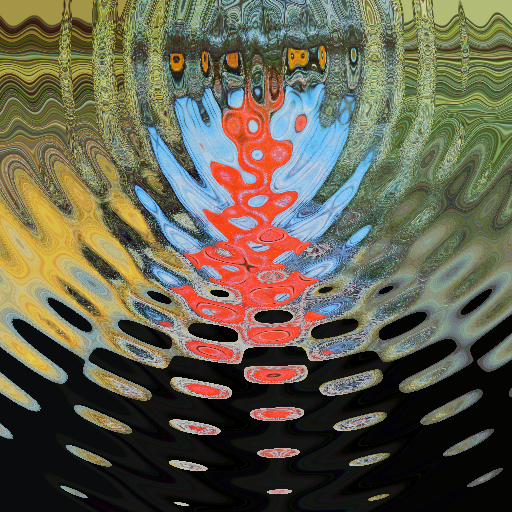

In [20]:
apply_warp(warp2, img, params)

In [21]:
# ah, time is in 0:9, but the array is 1:10
params[:time] = 2
params[:shift] = params[:time]/(1+0.01*params[:time])
params

Dict{Symbol, Real} with 8 entries:
  :xsize    => 512
  :ysize    => 512
  :shift    => 1.96078
  :xcenter2 => 55
  :ycenter2 => 355
  :ycenter1 => 176
  :xcenter1 => 61
  :time     => 2

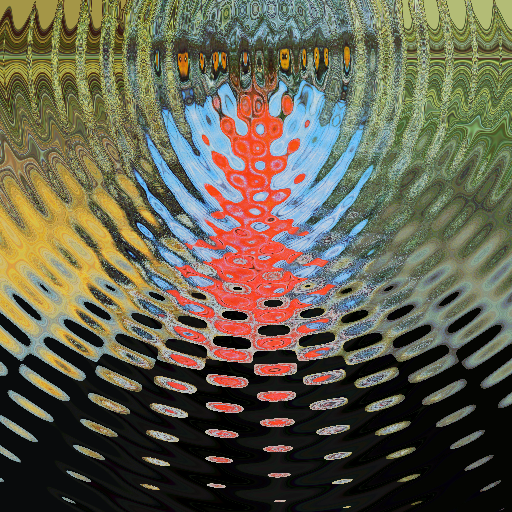

In [22]:
apply_warp(warp2, img, params)